# Introduction to Data Science with Python 
## General Assembly
## Natural Language Processing (NLP)

Make sure you have installed nltk and downloaded the following copora:

* punkt
* gutenberg



## Lab Part 1

###Tokenization

What:  Separate text into units such as sentences or words

Why:   Gives structure to previously unstructured text

Notes: Relatively easy with English language text, not easy with some languages


"corpus" = collection of documents

"corpora" = plural form of corpus


In [1]:
# Import the NLTK library, and use ntlk.corpus.gutenberg.fileids() to
# find the filenames for Jane Austen's Emma and Lewis Carrol's Alice in 
# Wonderland
import nltk
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [2]:
# Break these novels up into sentences. Put these sentence lists into
# a list so that you can use it later
emma_sentences = nltk.corpus.gutenberg.sents('austen-emma.txt')
alice_sentences = nltk.corpus.gutenberg.sents('carroll-alice.txt')

In [3]:
# Count the number of sentences in each novel.
len(emma_sentences)
len(alice_sentences)

1703

In [4]:
# Break each sentence up into words. You will end up with a 
# list of lists of words for Emma and another one for Alice in
# Wonderland

emma_sentences
alice_sentences

[[u'[', u'Alice', u"'", u's', u'Adventures', u'in', u'Wonderland', u'by', u'Lewis', u'Carroll', u'1865', u']'], [u'CHAPTER', u'I', u'.'], ...]

In [5]:
# Count the number of words in each sentence
words_per_sentence_emma = [len(x) for x in emma_sentences]
words_per_sentence_alice = [len(x) for x in alice_sentences]

In [6]:
# Which novel has more average words per sentence?
# Given their target audience, is this what you would expect?

avg_words_per_sentence_emma = sum(words_per_sentence_emma)/len(words_per_sentence_emma)
avg_words_per_sentence_emma

avg_words_per_sentence_alice = sum(words_per_sentence_alice)/len(words_per_sentence_alice)
avg_words_per_sentence_alice

#Alice has less average words per sentence so it is expected

20

In [7]:
# Create a flat list (i.e. not a list of lists) of words in
# the two novels
emma_words = nltk.corpus.gutenberg.words('austen-emma.txt')
alice_words = nltk.corpus.gutenberg.words('carroll-alice.txt')

In [8]:
# For each novel, construct a set of all the distinct words used
emma_distinct_words = set(emma_words)
alice_distinct_words = set(alice_words)

In [9]:
# Calculate the lexical diversity of each novel (distinct words / word count)

lexical_diversity_emma = (len(emma_distinct_words)*1.0)/len(emma_words)
lexical_diversity_emma

lexical_diversity_alice = (len(alice_distinct_words)*1.0)/len(alice_words)
lexical_diversity_alice

0.08841981823512167

In [10]:
# (Optional, only for the very keen)
# Repeat the above analysis for all the Gutenberg samples
# Create a dataframe with the names of the novels, when they were written,
# whether they were for children, the lexical diversity and the average sentence length.
# Can you use logistic regression to predict the audience, based on the content?

## Lab Part 2



In [11]:
# Make nltk.Text objects from the two novels
emma_text_obj = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
alice_text_obj = nltk.Text(nltk.corpus.gutenberg.words('carroll-alice.txt'))

In [12]:
# Does Jane Austen ever mention the word 'young' in Emma? What about Lewis Carroll?
emma_text_obj.concordance('young')
alice_text_obj.concordance('young')

Displaying 25 of 192 matches:
marriage . A worthy employment for a young lady ' s mind ! But if , which I rat
ice ." " Mr . Elton is a very pretty young man , to be sure , and a very good y
g man , to be sure , and a very good young man , and I have a great regard for 
hildren of their own , nor any other young creature of equal kindred to care fo
is fond report of him as a very fine young man had made Highbury feel a sort of
formed a very favourable idea of the young man ; and such a pleasing attention 
 . Knightley ; and by Mr . Elton , a young man living alone without liking it ,
ee of popularity for a woman neither young , handsome , rich , nor married . Mi
nciples and new systems -- and where young ladies for enormous pay might be scr
was no wonder that a train of twenty young couple now walked after her to churc
 a long visit in the country to some young ladies who had been at school there 
 Harriet Smith ' s being exactly the young friend she wanted -- exactly the som
was a sing

In [13]:
# What are the common contexts for these words?
emma_text_obj.common_contexts(['young'])
alice_text_obj.common_contexts(['young'])

accomplished_woman worthy_man the_farmer the_man unexceptionable_man
a_man so_as amiable_man pretty_woman the_are no_mrs too_: pert_lawyer
of_person alarming_man ,_cox a_woman too_; the_woman of_men
the_man here_lady the_crab the_lady this_lady


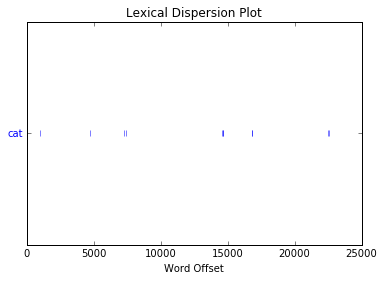

In [14]:
# Where does the word 'cat' appear in Alice and Wonderland?

#alice_text_obj.similar('cat')
#alice_text_obj.concordance('cat')
#alice_text_obj.common_contexts(['cat'])

%matplotlib inline
alice_text_obj.dispersion_plot(['cat'])

## Lab Part 3

###Stemming
What:  Reduce a word to its base/stem form

Why:   Often makes sense to treat multiple word forms the same way

Notes: Uses a "simple" and fast rule-based approach
       Output can be undesirable for irregular words
       Stemmed words are usually not shown to users (used for analysis/indexing)
       Some search engines treat words with the same stem as synonyms

In [15]:
# Create an English stemmer that uses the Snowball technique
# nltk.stem.snowball.SnowballStemmer

from nltk.stem.snowball import SnowballStemmer
Stemmer = SnowballStemmer('english')
Stemmer.stem('running')

#from nltk.stem.porter import PorterStemmer
#Stemmer = PorterStemmer()
#Stemmer.stem('running')



u'run'

In [16]:
#Stemmer = PorterStemmer

In [17]:
# Stem the following words: charge, charging, charged
Stemmer.stem('charge')
Stemmer.stem('charging')
Stemmer.stem('charged')

u'charg'

In [18]:
# Can you stem "words" with punctuation in them? Or which have no letters?
Stemmer.stem('charged.')
Stemmer.stem('chrged')

#No you cannot stem "words" with punctuation or no letters

u'chrged'

In [19]:
# Create a new list of words from the novels by dropping out spurious non-words.
# You might find word_is_just_letters() helpful
def word_is_just_letters(word):
    import re
    return re.search('^[a-zA-Z]+', word)


def is_a_real_word(x):
    return x not in ".,[]:!'?&-;()"

cleaned_up_alice = [
    x.lower() 
        for x in alice_distinct_words
        if word_is_just_letters(x)
]
cleaned_up_emma = [
    x.lower() 
        for x in emma_distinct_words
        if word_is_just_letters(x)
]

#cleaned_up_alice
#cleaned_up_emma

In [20]:
# Stem all those words

alice_stems = [Stemmer.stem(word) for word in cleaned_up_alice]
alice_stems
emma_stems = [Stemmer.stem(word) for word in cleaned_up_emma]
emma_stems

[u'yellow',
 u'four',
 u'doe',
 u'hang',
 u'aggress',
 u'brisk',
 u'look',
 u'elig',
 u'snow',
 u'rous',
 u'scold',
 u'unansw',
 u'fetch',
 u'lord',
 u'elig',
 u'meadow',
 u'sink',
 u'stipul',
 u'sweetbread',
 u'stab',
 u'bring',
 u'disturb',
 u'recollect',
 u'scholar',
 u'wood',
 u'acquit',
 u'tire',
 u'cordial',
 u'prefac',
 u'puls',
 u'tire',
 u'eleg',
 u'second',
 u'consent',
 u'error',
 u'contribut',
 u'wrong',
 u'increas',
 u'induc',
 u'hero',
 u'intellect',
 u'interrupt',
 u'here',
 u'properest',
 u'her',
 u'natur',
 u'substanc',
 u'garden',
 u'unwilling',
 u'pretens',
 u'report',
 u'militari',
 u'critic',
 u'divid',
 u'seclud',
 u'explain',
 u'civil',
 u'summon',
 u'brought',
 u'cherish',
 u'spoke',
 u'reproach',
 u'imparti',
 u'music',
 u'therefor',
 u'strike',
 u'femal',
 u'success',
 u'bring',
 u'whirl',
 u'hurt',
 u'glass',
 u'midst',
 u'hold',
 u'circumst',
 u'lock',
 u'pursu',
 u'accomplish',
 u'eatabl',
 u'exampl',
 u'misfortun',
 u'vaniti',
 u'la',
 u'unjust',
 u'cautio

In [21]:
# create two collections.Counter objects (one for each novel)
# so that you can easily count word stems. If you give
# the stemmed lists as an argument to constructor, 
# you can use .most_common(25) to get the top 25 tokens

from collections import Counter
alice_cnt = Counter() 
for word in alice_stems:
    alice_cnt[word] += 1
alice_cnt.most_common(25)

emma_cnt = Counter() 
for word in emma_stems:
    emma_cnt[word] += 1
emma_cnt.most_common(25)

[(u'respect', 11),
 (u'observ', 10),
 (u'thank', 8),
 (u'play', 8),
 (u'admir', 8),
 (u'like', 8),
 (u'relat', 7),
 (u'affect', 7),
 (u'delight', 7),
 (u'depend', 7),
 (u'approv', 7),
 (u'care', 7),
 (u'open', 7),
 (u'desir', 7),
 (u'suffer', 7),
 (u'fanci', 7),
 (u'imagin', 7),
 (u'invit', 7),
 (u'live', 7),
 (u'engag', 7),
 (u'encourag', 7),
 (u'enjoy', 6),
 (u'object', 6),
 (u'accord', 6),
 (u'assur', 6)]

###Lemmatization / synset
What:  Derive the canonical form ('lemma') of a word
    
Why:   Can be better than stemming, reduces words to a 'normal' form.
    
Notes: Uses a dictionary-based approach (slower than stemming)
    

In [22]:
# What synsets does 'dog' belong to?
nltk.corpus.wordnet.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [23]:
# Which synset is the one you were thinking of?
nltk.corpus.wordnet.synsets('dog')[0].definition()

u'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [24]:
# What is its hypernym?
dog = nltk.corpus.wordnet.synsets('dog')[0]
dog.hypernyms()[0]
#dog.hypernyms()[0].hypernyms()

Synset('canine.n.02')

In [25]:
# What about wolves? What synsets does it belong to?
wolves = nltk.corpus.wordnet.synsets('wolves')[0]
wolves.hypernyms()[0]
#wolves.hypernyms()[0].hypernyms()

Synset('canine.n.02')

In [26]:
# How closely related are those concepts (dogs and wolves)?
wolves.path_similarity(dog)
#wolves.lowest_common_hypernyms(dog)

0.3333333333333333

In [27]:
# How closely related are the concepts 'dog' and 'novel'?
dog.lowest_common_hypernyms(nltk.corpus.wordnet.synsets('novel')[0])
dog.path_similarity(nltk.corpus.wordnet.synsets('novel')[0])

0.0625

## Lab Part 3 Part of speech tagging

Other:
- Analysing data with the Alchemy API
- Further Reading

###Part of Speech Tagging

What:  Determine the part of speech of a word
    
Why:   This can inform other methods and models such as Named Entity Recognition
    
Notes: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [28]:
# Use nltk.pos_tag to parse a sentence
nltk.pos_tag(nltk.word_tokenize('I am learning Data Science and soon would be working on this'))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('learning', 'VBG'),
 ('Data', 'NNP'),
 ('Science', 'NNP'),
 ('and', 'CC'),
 ('soon', 'RB'),
 ('would', 'MD'),
 ('be', 'VB'),
 ('working', 'VBG'),
 ('on', 'IN'),
 ('this', 'DT')]

In [29]:
# (Optional for the enthusiastic)
# What verbs did Jane Austen use a lot of?

## Lab Part 4
###Stopword Removal

What:  Remove common words that will likely appear in any text
    
Why:   They don't tell you much about your text

In [30]:
# most of top 25 stemmed tokens are "worthless"
c.most_common(25)

NameError: name 'c' is not defined

In [31]:
# view the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
sorted(stopwords)

[u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'ain',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'aren',
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'couldn',
 u'd',
 u'did',
 u'didn',
 u'do',
 u'does',
 u'doesn',
 u'doing',
 u'don',
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'hadn',
 u'has',
 u'hasn',
 u'have',
 u'haven',
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'isn',
 u'it',
 u'its',
 u'itself',
 u'just',
 u'll',
 u'm',
 u'ma',
 u'me',
 u'mightn',
 u'more',
 u'most',
 u'mustn',
 u'my',
 u'myself',
 u'needn',
 u'no',
 u'nor',
 u'not',
 u'now',
 u'o',
 u'of',
 u'off',
 u'on',
 u'once',
 u'only',
 u'or',
 u'other',
 u'our',
 u'ours',
 u'ourselves',
 u'out',
 u'over',
 u'own',
 u're',
 u's',
 u'same',
 u'shan',
 u'she',
 u'shoul

In [32]:
##################
### Exercise  ####
##################


# Create a variable called stemmed_stops which is the 
# stemmed version of each stopword in stopwords
# Use the stemmer we used up above!

stemmed_stops = [Stemmer.stem(word) for word in stopwords]
stemmed_stops

# Then create a list called stemmed_tokens_no_stop that 
# contains only the tokens in stemmed_tokens that aren't in 
# stemmed_stops


# Show the 25 most common stemmed non stop word tokens

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'our',
 u'ourselv',
 u'you',
 u'your',
 u'your',
 u'yourself',
 u'yourselv',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'her',
 u'herself',
 u'it',
 u'it',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'their',
 u'themselv',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'be',
 u'have',
 u'has',
 u'had',
 u'have',
 u'do',
 u'doe',
 u'did',
 u'do',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'becaus',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'dure',
 u'befor',
 u'after',
 u'abov',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'onc',
 u'here',
 u'there',
 u'when',
 u'where',
 u'whi',
 u'how',
 u'all',
 u'ani',
 u'both',
 u'e

## Lab Part 5
###Named Entity Recognition

What:  Automatically extract the names of people, places, organizations, etc.

Why:   Can help you to identify "important" words

Notes: Training NER classifier requires a lot of annotated training data
       Should be trained on data relevant to your task
       Stanford NER classifier is the "gold standard"

In [33]:
sentence = 'Ian is an instructor for General Assembly'

tokenized = nltk.word_tokenize(sentence)

tokenized

['Ian', 'is', 'an', 'instructor', 'for', 'General', 'Assembly']

In [34]:
tagged = nltk.pos_tag(tokenized)

tagged


[('Ian', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('instructor', 'NN'),
 ('for', 'IN'),
 ('General', 'NNP'),
 ('Assembly', 'NNP')]

In [35]:
chunks = nltk.ne_chunk(tagged)

chunks

LookupError: 
**********************************************************************
  Resource
  u'chunkers/maxent_ne_chunker/english_ace_multiclass.pickle' not
  found.  Please use the NLTK Downloader to obtain the resource:
  >>> nltk.download()
  Searched in:
    - '/Users/samuelbolivar/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - u''
**********************************************************************

In [36]:
def extract_entities(text):
    entities = []
    # tokenize into sentences
    for sentence in nltk.sent_tokenize(text):
        # tokenize sentences into words
        # add part-of-speech tags
        # use NLTK's NER classifier
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        # parse the results
        entities.extend([chunk for chunk in chunks if hasattr(chunk, 'label')])
    return entities

for entity in extract_entities('Ian is an instructor for General Assembly'):
    print '[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves())

LookupError: 
**********************************************************************
  Resource
  u'chunkers/maxent_ne_chunker/english_ace_multiclass.pickle' not
  found.  Please use the NLTK Downloader to obtain the resource:
  >>> nltk.download()
  Searched in:
    - '/Users/samuelbolivar/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - u''
**********************************************************************

## Lab Part 6
###Term Frequency - Inverse Document Frequency (TF-IDF)

What:  Computes "relative frequency" that a word appears in a document
           compared to its frequency across all documents

Why:   More useful than "term frequency" for identifying "important" words in
           each document (high frequency in that document, low frequency in
           other documents)

Notes: Used for search engine scoring, text summarization, document clustering

How: 
    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [49]:
sample = ['Bob likes sports', 'Bob hates sports', 'Bob likes likes trees']

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

In [56]:
# Each row represents a sentence
# Each column represents a word
vect.fit_transform(sample).toarray()
vect.get_feature_names()

[u'bob', u'hates', u'likes', u'sports', u'trees']

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(sample).toarray()
#tfidf.get_feature_names()


array([[ 0.48133417,  0.        ,  0.61980538,  0.61980538,  0.        ],
       [ 0.42544054,  0.72033345,  0.        ,  0.54783215,  0.        ],
       [ 0.30861775,  0.        ,  0.7948031 ,  0.        ,  0.52253528]])

In [65]:
# the IDF of each word
idf = tfidf.idf_
print dict(zip(tfidf.get_feature_names(), idf))

{u'bob': 1.0, u'trees': 1.6931471805599454, u'likes': 1.2876820724517808, u'hates': 1.6931471805599454, u'sports': 1.2876820724517808}


In [71]:
###############
## Exercise ###
###############


# for each sentence in sample, find the most "interesting 
#words" by ordering their tfidf in ascending order

## Lab Part 7

###LDA - Latent Dirichlet Allocation

What:  Way of automatically discovering topics from sentences

Why:   Much quicker than manually creating and identifying topic clusters

In [80]:
import lda

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(sentences)

NameError: name 'sentences' is not defined

In [81]:
# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))


NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [82]:
# EXAMPLE: Automatically summarize a document


# corpus of 2000 movie reviews
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(filename) for filename in movie_reviews.fileids()]


In [83]:
# create document-term matrix
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(reviews)
features = tfidf.get_feature_names()

In [78]:
import numpy as np


In [79]:
# find the most and least "interesting" sentences in a randomly selected review
def summarize():
    
    # choose a random movie review    
    review_id = np.random.randint(0, len(reviews))
    review_text = reviews[review_id]

    # we are going to score each sentence in the review for "interesting-ness"
    sent_scores = []
    # tokenize document into sentences
    for sentence in nltk.sent_tokenize(review_text):
        # exclude short sentences
        if len(sentence) > 6:
            score = 0
            token_count = 0
            # tokenize sentence into words
            tokens = nltk.word_tokenize(sentence)
            # compute sentence "score" by summing TFIDF for each word
            for token in tokens:
                if token in features:
                    score += dtm[review_id, features.index(token)]
                    token_count += 1
            # divide score by number of tokens
            sent_scores.append((score / float(token_count + 1), sentence))

    # lowest scoring sentences
    print '\nLOWEST:\n'
    for sent_score in sorted(sent_scores)[:3]:
        print sent_score[1]

    # highest scoring sentences
    print '\nHIGHEST:\n'
    for sent_score in sorted(sent_scores, reverse=True)[:3]:
        print sent_score[1]

# try it out!
summarize()


LOWEST:

where's joblo coming from ?
he comes through as per his usual high-level style here , and gives the audience a completely different side to his talent , of which , i personally would like to see more .
of course , we're receiving this lesson from a man who has put away a lot of scum in his time , but the things he seems to be doing aren't exactly on the up-and-up either .

HIGHEST:

the 
dirt on the streets , and proceeds to teach the rookie cop ( and us , the audience ) how things really work down there .
it's a rookie cop's narcotics training alongside a seasoned police veteran .
do you agree that you yourself would need to break a few small laws in order to put away the people who break the really big ones ?


## Lab Part 8

In [4]:
# TextBlob Demo: "Simplified Text Processing"
# Installation: pip install textblob
! pip install textblob

In [5]:
from textblob import TextBlob, Word

In [6]:
# identify words and noun phrases
blob = TextBlob('Greg and Adrian are instructors for General Assembly')
blob.words
blob.noun_phrases

WordList(['greg', 'adrian', u'general assembly'])

In [7]:
# sentiment analysis
blob = TextBlob('I hate this horrible movie. This movie is not very good.')
blob.sentences
blob.sentiment.polarity
[sent.sentiment.polarity for sent in blob.sentences]

[-0.9, -0.26923076923076916]

In [8]:
# sentiment subjectivity
TextBlob("I am a cool person").sentiment.subjectivity # Pretty subjective
TextBlob("I am a person").sentiment.subjectivity # Pretty objective
# different scores for essentially the same sentence
print TextBlob('Greg and Adrian are instructors for General Assembly in Sydney').sentiment.subjectivity



0.5


In [9]:
# singularize and pluralize
blob = TextBlob('Put away the dishes.')
[word.singularize() for word in blob.words]

['Put', 'away', 'the', 'dish']

In [10]:
[word.pluralize() for word in blob.words]


['Puts', 'aways', 'thes', 'dishess']

In [11]:
# spelling correction
blob = TextBlob('15 minuets late')
blob.correct()

TextBlob("15 minutes late")

In [12]:
# spellcheck
Word('parot').spellcheck()


[('part', 0.9929478138222849), (u'parrot', 0.007052186177715092)]

In [13]:
# definitions
Word('bank').define()
Word('bank').define('v')

[u'tip laterally',
 u'enclose with a bank',
 u'do business with a bank or keep an account at a bank',
 u'act as the banker in a game or in gambling',
 u'be in the banking business',
 u'put into a bank account',
 u'cover with ashes so to control the rate of burning',
 u'have confidence or faith in']

In [14]:
# translation and language identification
blob = TextBlob('Welcome to the classroom.')
blob.translate(to='es')
blob = TextBlob('Hola amigos')
blob.detect_language()

u'es'